## Assignment 01
### Name :- ADIKARI A.M.A.D.
### Index No :- 190021A

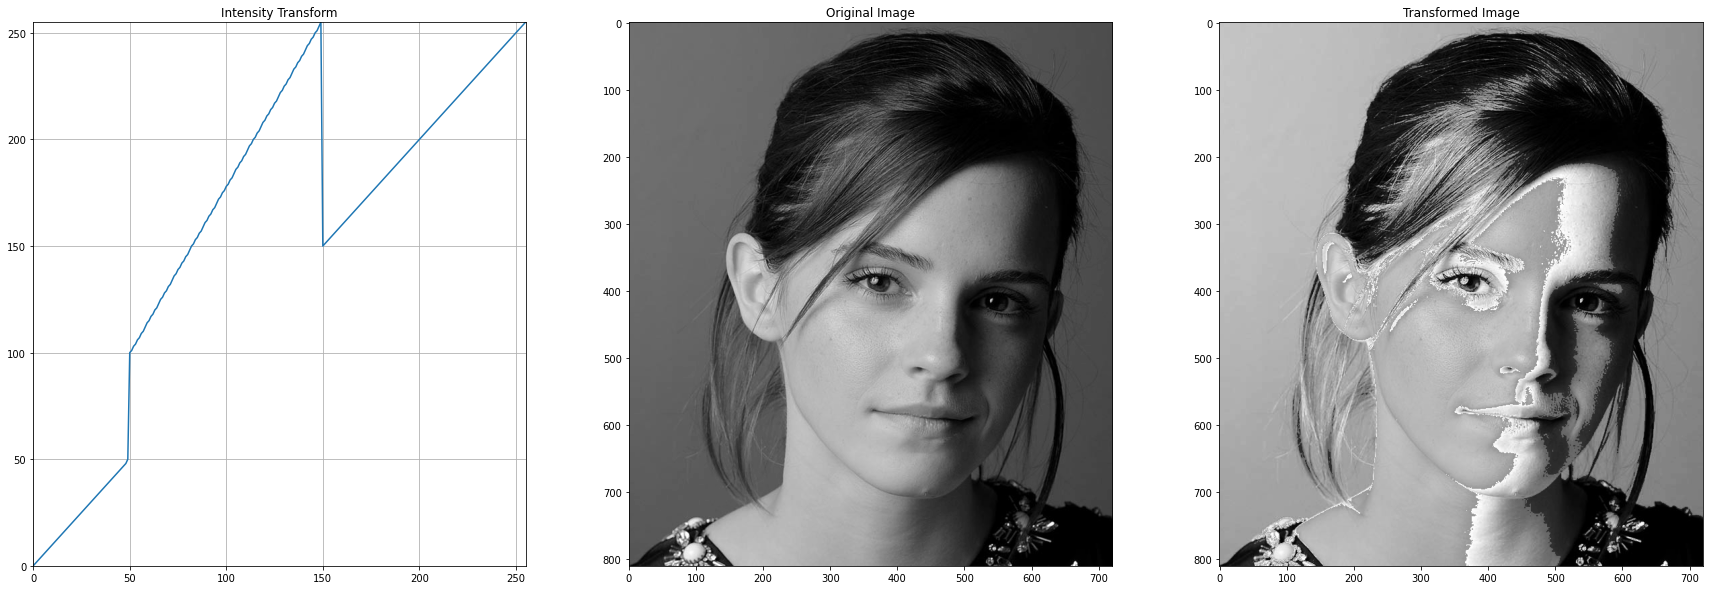

In [6]:
# Question 01
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None

# Intensity transformation
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (30, 10))
# graph
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_title("Intensity Transform")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)

# images
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("Original Image")

ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title("Transformed Image")
plt.show()

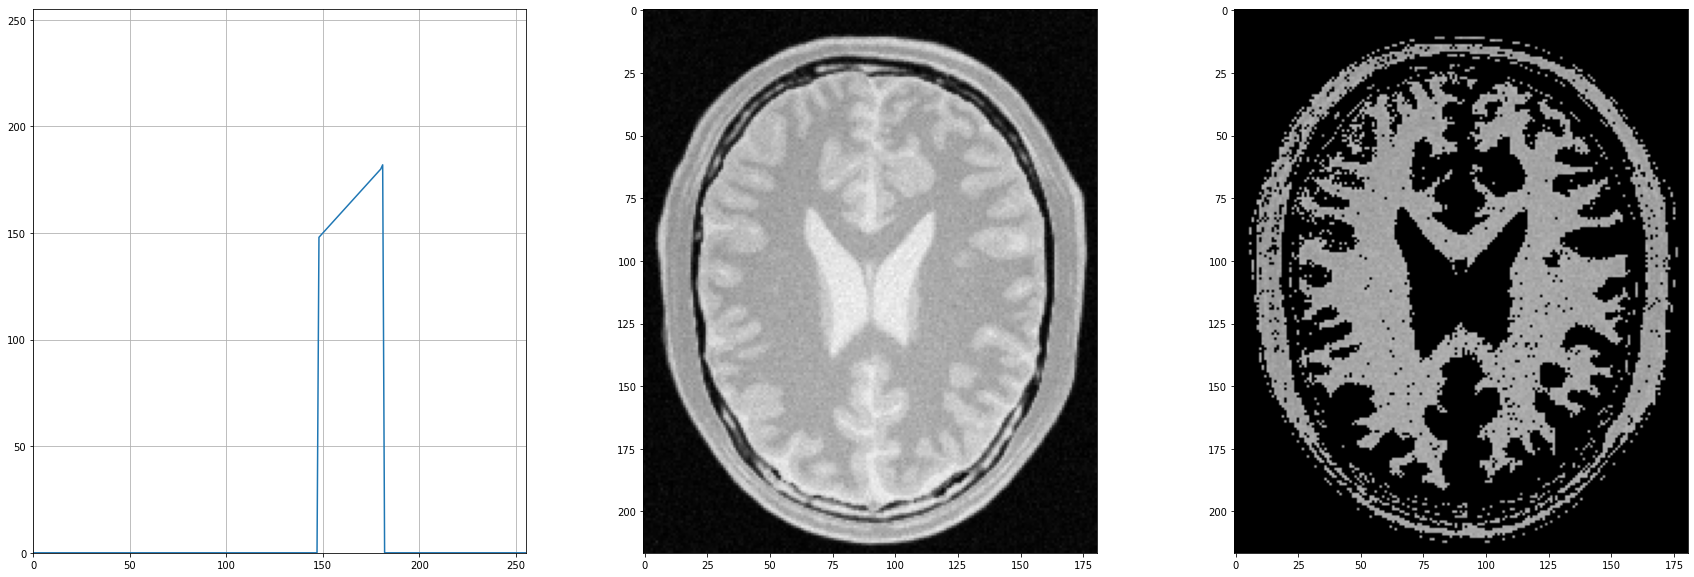

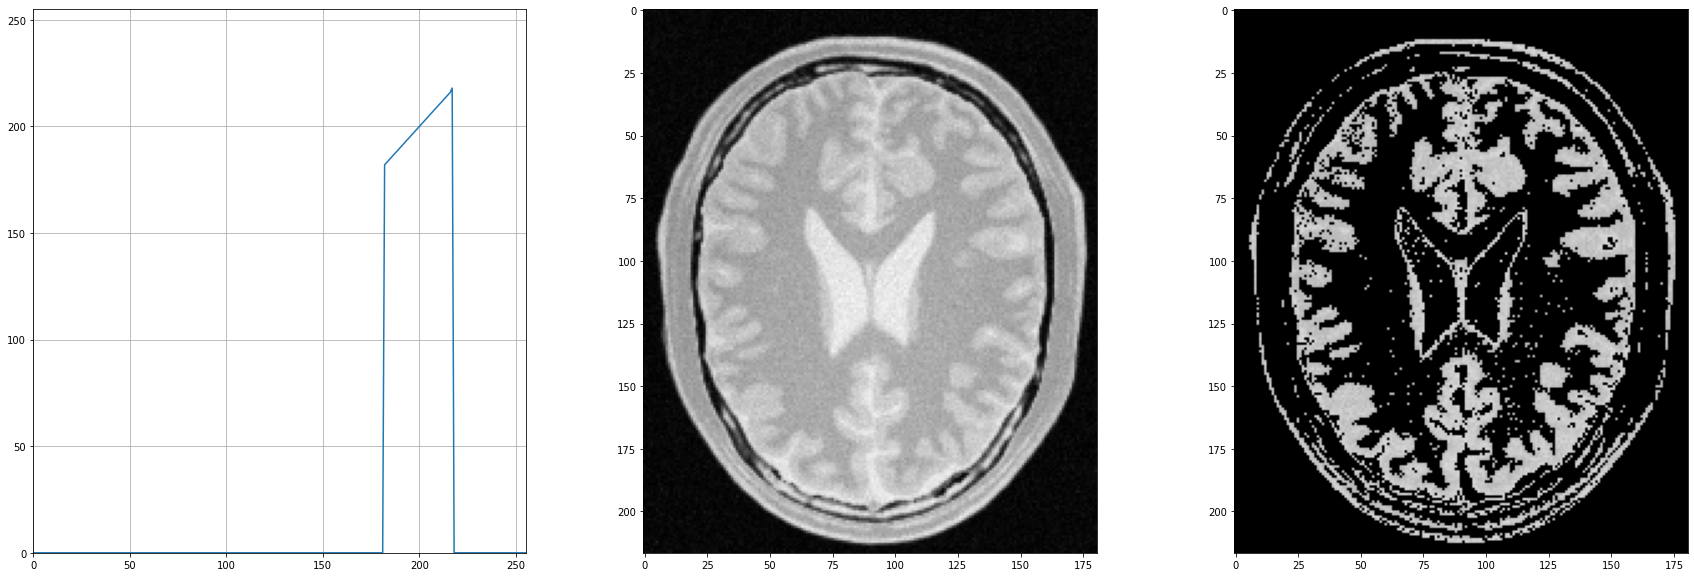

In [16]:
#Question 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert image is not None
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

white_begin = 148
white_end = 182
t1 = np.linspace(0, 0, white_begin)
t2 = np.linspace(white_begin, white_end, white_end - white_begin)
t3 = np.linspace(0, 0, 256 - white_end)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (30, 10))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)

gray_begin = 182
gray_end = 218
t1 = np.linspace(0, 0, gray_begin)
t2 = np.linspace(gray_begin, gray_end, gray_end - gray_begin)
t3 = np.linspace(0, 0, 256 - gray_end)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (30, 10))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)

plt.show()

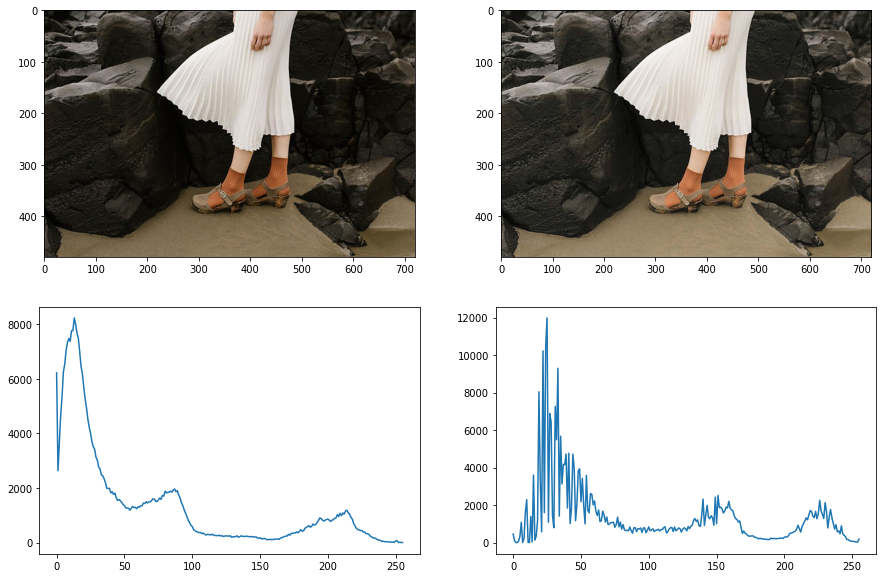

In [48]:
# Question 03
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('highlights_and_shadows.jpg')
assert image is not None
Lab_image = cv.cvtColor(image, cv.COLOR_BGR2Lab)
img = np.array(Lab_image)
hist_img = cv.calcHist([image], [0], None, [256], [0, 256])
L,a,b = cv.split(img)
ga = 0.75
t = np.array([(p/255)**ga*255 for p in range(0, 256)]).astype(np.uint8)
L = cv.LUT(L, t)
modified_image = cv.merge([L, a, b])
new_image = cv.cvtColor(modified_image, cv.COLOR_Lab2RGB)
hist_new_image = cv.calcHist([new_image], [0], None, [256], [0, 256])
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].imshow(image)
ax[0][1].imshow(new_image)
ax[1][0].plot(hist_img)
ax[1][1].plot(hist_new_image)
plt.show()

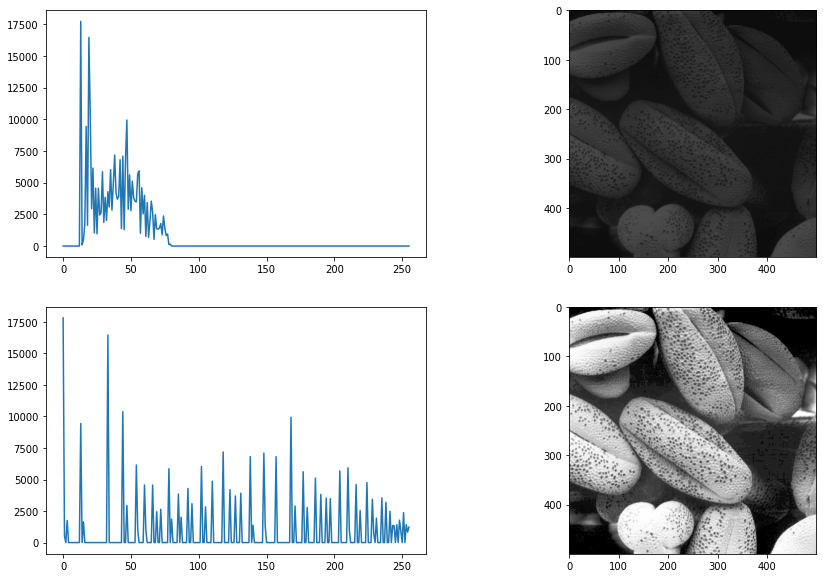

In [51]:
# Question 04

img1 = cv.imread("shells.png",cv.IMREAD_GRAYSCALE)

hist_f = cv.calcHist([img1],[0],None,[256],[0,256])
g = cv.equalizeHist(img1)
hist_g = cv.calcHist([g],[0],None,[256],[0,256])


fig, ax  = plt.subplots(2,2,figsize = (15, 10))
ax[0][0].plot(hist_f)
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
ax[0][1].imshow(img1)

ax[1][0].plot(hist_g)
g = cv.cvtColor(g,cv.COLOR_BGR2RGB)
ax[1][1].imshow(g)

plt.show()

(270, 480, 3) (1080, 1920, 3)


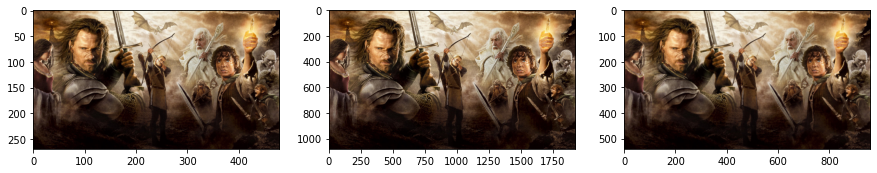

In [36]:
# Question 05
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_s = cv.imread('./a1q5images/im01small.png')
img_l = cv.imread('./a1q5images/im01.png')
img_s = cv.cvtColor(img_s, cv.COLOR_BGR2RGB)
img_l = cv.cvtColor(img_l, cv.COLOR_BGR2RGB)
print(np.shape(img_s), np.shape(img_l))

s = 2
rows, cols = img_s.shape[0] * s, img_s.shape[1] * s
zoomed_img = np.zeros((rows, cols, 3), dtype=img_s.dtype)
for i in range(0, rows):
    for j in range(0, cols):
        for k in range(0, 3):
            zoomed_img[i, j, k] = img_s[int(i/s), int(j/s), k]

fig, ax = plt.subplots(1, 3, figsize = (15, 10))


ax[0].imshow(img_s)
ax[1].imshow(img_l)
ax[2].imshow(zoomed_img)

plt.show()

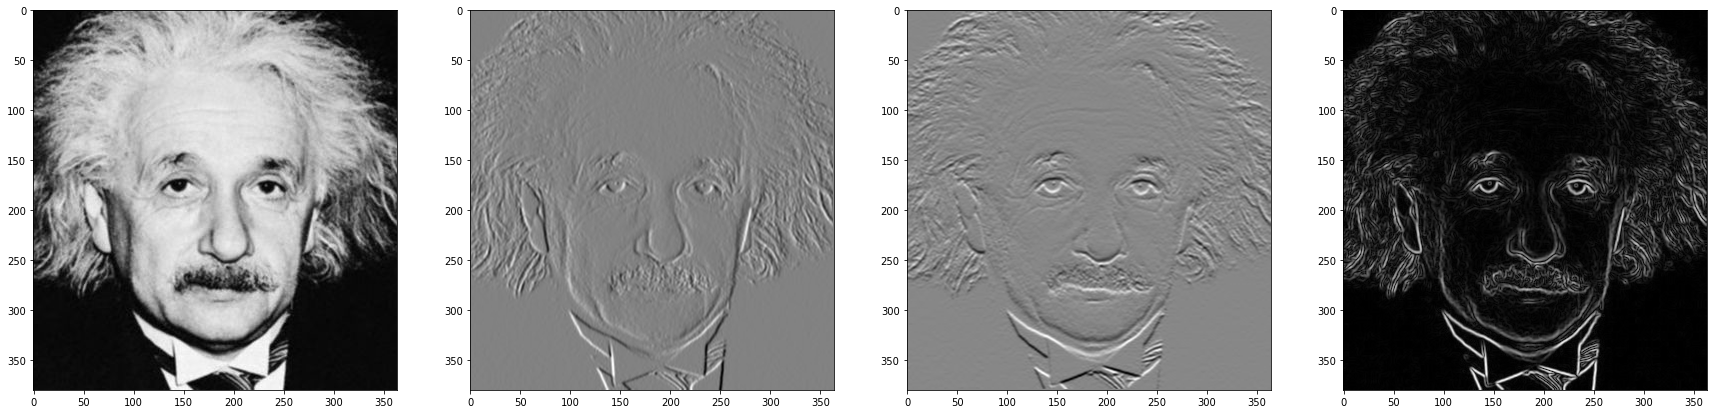

In [64]:
# Question 06
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_h_kernal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
sobel_h_img = cv.filter2D(image, -1, sobel_h_kernal)
sobel_v_kernal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]] , dtype = 'float')
sobel_v_img = cv.filter2D(image, -1, sobel_v_kernal)

# row = 1
# col = 3
# im = image[row-1:row+2, col-1:col+2]
# print(im)
# con = np.multiply(im, sobel_h_kernal)
# print(con)
# print(int(sum(sum(con))))
# print(sobel_h_img[1])

gradient_img = (sobel_v_img**2 + sobel_h_img**2)**0.5

fig, ax = plt.subplots(1, 4, figsize = (30, 10))
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(sobel_h_img, cmap = 'gray')
ax[2].imshow(sobel_v_img, cmap = 'gray')
ax[3].imshow(gradient_img, cmap = 'gray')
plt.show()

(380, 364)


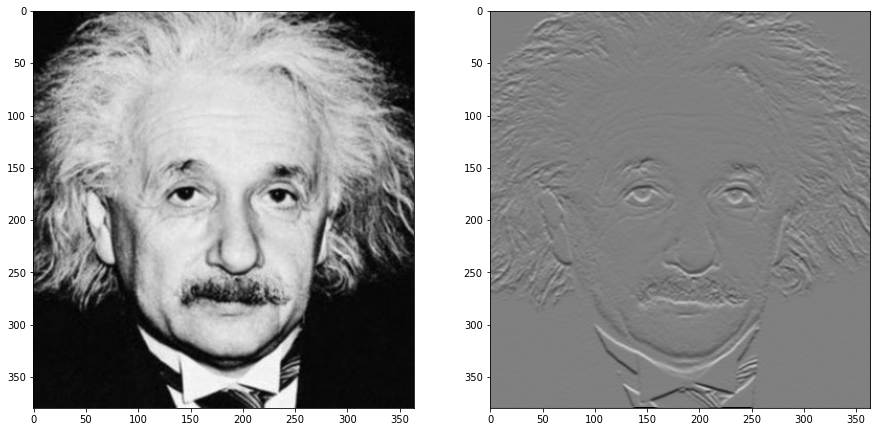

In [69]:
import cv2 as cv
import numpy as np

def sobel_filter(image, kernal):
    print(np.shape(image))
    h, w = np.shape(image)
    k_size = len(kernal)
    pad_size = k_size//2
    upper_pad = np.zeros((pad_size, w + 2*pad_size))
    lower_pad = upper_pad
    mid_pad = np.zeros((h, pad_size))
    mid_img = np.append(mid_pad, image, axis = 1)
    mid_img = np.append(mid_img, mid_pad, axis = 1)
    new_image = np.concatenate((upper_pad, mid_img, lower_pad))

    convoluted_img = np.zeros((h, w))
    for row in range(pad_size, h+pad_size):
        for col in range(pad_size, w+pad_size):
            neighbourhood = np.array([[new_image[row-1][col-1], new_image[row-1][col], new_image[row-1][col+1]], [new_image[row][col-1], new_image[row][col], new_image[row][col+1]], [new_image[row+1][col-1], new_image[row+1][col], new_image[row+1][col+1]]])
            convoluted_img[row - pad_size][col - pad_size] = int(sum(sum(np.multiply(neighbourhood, kernal))))
    return convoluted_img


image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
kernal =  np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]] , dtype = 'float')
filtered_image = sobel_filter(image, kernal)

fig, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[1].imshow(filtered_image, cmap='gray', vmin=-1020, vmax=1020)
plt.show()


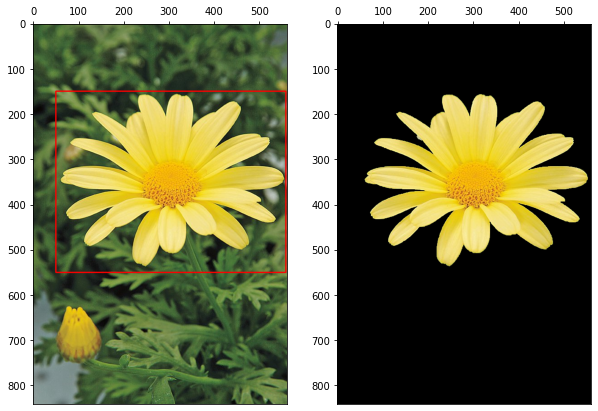

In [129]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('daisy.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
mask = np.zeros(image.shape[:2], dtype=np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 150, 508, 400)
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==0) | (mask==2), 0, 1).astype(np.uint8)
cut_image = image * mask2[:,:,np.newaxis]

image = cv.rectangle(image, (50, 150), (558, 550), (255, 0, 0), 2)
fig, ax = plt.subplots(1, 2, figsize = (10, 20))
ax[0].imshow(image)
ax[0].xaxis.tick_top()

ax[1].imshow(cut_image)
ax[1].xaxis.tick_top()

plt.show()